### Import Data and Required Packages
Importing Pandas, Numpy, Matplotlib, Seaborn, Scikit-learn 

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

### Import the CSV Data as Pandas DataFrame
Importing both Demand and Weather Data of Demand Forecasting and merging them

In [3]:
df_demand = pd.read_csv('../../dataset/Demand Forecasting/Demand Forecasting Demand Data upto Feb 21.csv', sep=',')
df_weather = pd.read_csv('../../dataset/Demand Forecasting/Demand Forecasting Weather Data upto Feb 28.csv', sep=',')
df_merged=pd.merge(left=df_demand,right=df_weather, on='datetime')

### Show Top 5 Records
Showing top 5 and last 5 records


In [4]:
df_merged.head()

,datetime,Demand (MW),Name,Temperature,feelslike,dewpoint,humidity,precipitation,precipprob,preciptype,...,visibility,solarradiation,uvindex,severerisk,conditions,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,1/1/2020 0:00,445.8,Pokhara,38.0,34.4,29.0,69.76,0.0,0,NaN,...,9.9,0.0,0,NaN,Overcast,NaN,NaN,NaN,NaN,NaN
1,1/1/2020 1:00,424.5,Pokhara,38.0,34.4,29.9,72.37,0.0,0,NaN,...,9.9,0.0,0,NaN,Overcast,NaN,NaN,NaN,NaN,NaN
2,1/1/2020 2:00,423.5,Pokhara,38.0,35.7,30.8,75.06,0.0,0,NaN,...,9.9,0.0,0,NaN,Overcast,NaN,NaN,NaN,NaN,NaN
3,1/1/2020 3:00,418.8,Pokhara,37.1,33.4,29.9,74.97,0.0,0,NaN,...,9.9,0.0,0,NaN,Partially cloudy,NaN,NaN,NaN,NaN,NaN
4,1/1/2020 4:00,414.8,Pokhara,35.1,32.3,29.0,78.41,0.0,0,NaN,...,9.9,0.0,0,NaN,Clear,NaN,NaN,NaN,NaN,NaN


In [5]:
df_merged.tail()

,datetime,Demand (MW),Name,Temperature,feelslike,dewpoint,humidity,precipitation,precipprob,preciptype,...,visibility,solarradiation,uvindex,severerisk,conditions,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
27547,2/21/2023 19:00,498.7,Pokhara,50.0,49.4,29.0,44.19,0.0,0,NaN,...,9.9,0.0,0,10.0,Partially cloudy,NaN,NaN,NaN,NaN,NaN
27548,2/21/2023 20:00,498.8,Pokhara,50.0,49.4,28.1,42.59,0.0,0,NaN,...,9.9,0.0,0,10.0,Partially cloudy,NaN,NaN,NaN,NaN,NaN
27549,2/21/2023 21:00,506.4,Pokhara,53.1,53.1,26.1,34.92,0.0,0,NaN,...,9.9,0.0,0,10.0,Overcast,NaN,NaN,NaN,NaN,NaN
27550,2/21/2023 22:00,478.8,Pokhara,53.1,53.1,28.1,38.02,0.0,0,NaN,...,9.9,0.0,0,10.0,Overcast,NaN,NaN,NaN,NaN,NaN
27551,2/21/2023 23:00,457.7,Pokhara,53.1,53.1,30.8,42.44,0.0,0,NaN,...,9.9,0.0,0,10.0,Overcast,NaN,NaN,NaN,NaN,NaN


### Checking if Unamed columns have any data
Checking the data in unnamed columns and removing all the empty columns

In [9]:
for i in range(21, 26):
    column_name = f'Unnamed: {i}'
    count_non_null = df_merged[column_name].notna().sum()
    print(f"Non-null values in {column_name}: {count_non_null}")

Non-null values in Unnamed: 21: 0
Non-null values in Unnamed: 22: 0
Non-null values in Unnamed: 23: 0
Non-null values in Unnamed: 24: 0
Non-null values in Unnamed: 25: 1


In [10]:
columns_to_drop = ['Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25']
df_merged.drop(columns_to_drop, inplace=True, axis=1)

### Performing Datachecks
Checking for null values

In [11]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27552 entries, 0 to 27551
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   datetime          27552 non-null  object 
 1   Demand (MW)       27552 non-null  float64
 2   Name              27552 non-null  object 
 3   Temperature       27552 non-null  float64
 4   feelslike         27552 non-null  float64
 5   dewpoint          27552 non-null  float64
 6   humidity          27552 non-null  float64
 7   precipitation     27552 non-null  float64
 8   precipprob        27552 non-null  int64  
 9   preciptype        2745 non-null   object 
 10  snow              27534 non-null  float64
 11  snowdepth         27534 non-null  float64
 12  windgust          12055 non-null  float64
 13  windspeed         27552 non-null  float64
 14  winddirection     27552 non-null  float64
 15  sealevelpressure  27534 non-null  float64
 16  cloudcover        27552 non-null  float6

### Filling most appropriate values for severerisk 
Filling severerisk with 0 on nan values for more appropraite correlation analysis

In [12]:
df_merged['severerisk'].fillna(0, inplace=True)

### Dropping redundant data
Dropping preciptype and precipprob as precipitation has more accurate and non-null data, similarly dropping windgust and keeping windspeed

In [14]:
df_merged.drop(["precipprob", "preciptype" ], inplace=True, axis=1)
df_merged.drop(['windgust'], inplace=True, axis=1)

In [17]:
df_merged

,datetime,Demand (MW),Name,Temperature,feelslike,dewpoint,humidity,precipitation,snow,snowdepth,windgust,windspeed,winddirection,sealevelpressure,cloudcover,visibility,solarradiation,uvindex,severerisk,conditions
0,1/1/2020 0:00,445.8,Pokhara,38.0,34.4,29.0,69.76,0.0,0.0,0.0,NaN,4.7,220.0,1015.4,100.0,9.9,0.0,0,0.0,Overcast
1,1/1/2020 1:00,424.5,Pokhara,38.0,34.4,29.9,72.37,0.0,0.0,0.0,NaN,4.7,230.0,1015.3,100.0,9.9,0.0,0,0.0,Overcast
2,1/1/2020 2:00,423.5,Pokhara,38.0,35.7,30.8,75.06,0.0,0.0,0.0,NaN,3.4,230.0,1015.4,100.0,9.9,0.0,0,0.0,Overcast
3,1/1/2020 3:00,418.8,Pokhara,37.1,33.4,29.9,74.97,0.0,0.0,0.0,NaN,4.7,220.0,1015.3,88.9,9.9,0.0,0,0.0,Partially cloudy
4,1/1/2020 4:00,414.8,Pokhara,35.1,32.3,29.0,78.41,0.0,0.0,0.0,NaN,3.4,240.0,1015.2,0.0,9.9,0.0,0,0.0,Clear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27547,2/21/2023 19:00,498.7,Pokhara,50.0,49.4,29.0,44.19,0.0,0.0,0.0,12.8,3.4,100.0,1009.1,50.0,9.9,0.0,0,10.0,Partially cloudy
27548,2/21/2023 20:00,498.8,Pokhara,50.0,49.4,28.1,42.59,0.0,0.0,0.0,15.0,3.4,110.0,1008.1,88.9,9.9,0.0,0,10.0,Partially cloudy
27549,2/21/2023 21:00,506.4,Pokhara,53.1,53.1,26.1,34.92,0.0,0.0,0.0,18.3,5.8,130.0,1007.3,100.0,9.9,0.0,0,10.0,Overcast
27550,2/21/2023 22:00,478.8,Pokhara,53.1,53.1,28.1,38.02,0.0,0.0,0.0,17.2,5.8,110.0,1006.2,100.0,9.9,0.0,0,10.0,Overcast


### Interpolation of data
Using .interpolate() method to add most appropriate datas in place of NaN values

In [18]:
for column in df_merged.columns[3:17]:
    df_merged[column] = df_merged[column].interpolate(method='linear', limit_direction='forward', axis=0)

### Histogram & KDE
 - It is evident that the distribution of the 'Demand (MW)' column in the dataset closely aligns with a log-normal distribution.

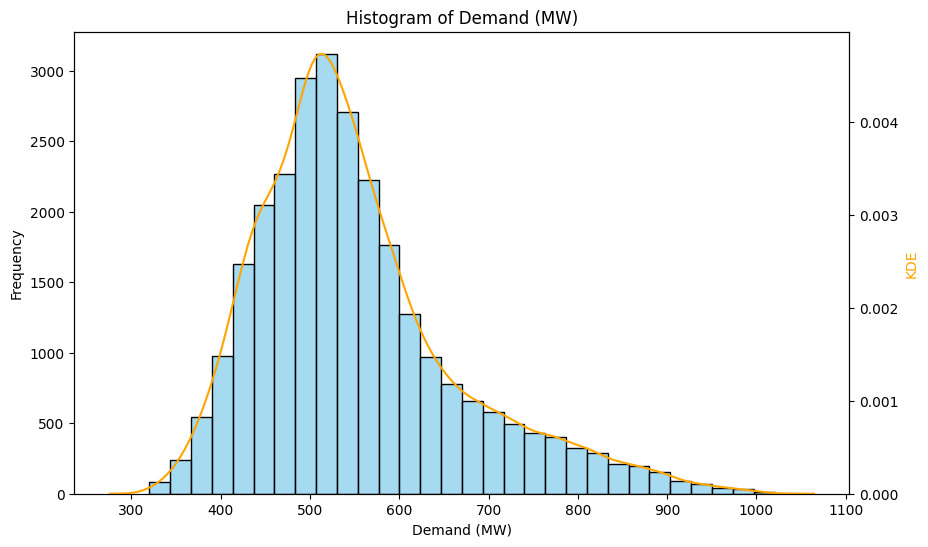

In [37]:
df_merged['datetime'] = pd.to_datetime(df_merged['datetime'])

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot histogram
sns.histplot(df_merged['Demand (MW)'], kde=False, bins=30, color='skyblue', ax=ax)
ax.set_title(f'Histogram of Demand (MW)')
ax.set_xlabel('Demand (MW)')
ax.set_ylabel('Frequency')

# New axis for the KDE plot
ax2 = ax.twinx()
sns.kdeplot(df_merged['Demand (MW)'], color='orange', ax=ax2)
ax2.set_ylabel('KDE', color='orange')

plt.show()

### Analyzing Correlation 
Analyzing Correlation between Demand(MW) and other paramaters

In [19]:
for column in df_merged.columns[3:18]:
    print(f"Correlation of price with {column}: {df_merged['Demand (MW)'].corr(df_merged[column])}")

Correlation of price with Temperature: 0.45233960384840355
Correlation of price with feelslike: 0.441472933404926
Correlation of price with dewpoint: 0.36261299654331075
Correlation of price with humidity: -0.19572462989123424
Correlation of price with precipitation: -0.01703203825114374
Correlation of price with snow: 0.015329744060287651
Correlation of price with snowdepth: 0.053608035983984836
Correlation of price with windgust: -0.010266245880946101
Correlation of price with windspeed: 0.0638931667548697
Correlation of price with winddirection: 0.05303417125254197
Correlation of price with sealevelpressure: -0.029717039764268344
Correlation of price with cloudcover: -0.06553044175434343
Correlation of price with visibility: 0.08506004019113436
Correlation of price with solarradiation: 0.3754670173935636
Correlation of price with uvindex: 0.37277231672656064


### Dropping less significant data
Dropping less significant data after correlation analysis, i.e very low correlation as well as redundant data (i.e solarradiation and uv index where both have almost 1 correlation , here data with higher correlation is kept)


In [21]:
print(df_merged["solarradiation"].corr(df_merged["uvindex"]))
print(df_merged["Temperature"].corr(df_merged["feelslike"]))

0.9963920843433212
0.9941671111931238


In [22]:
df_merged.drop(['feelslike','uvindex', 'precipitation', 'sealevelpressure', 'snow', 'snowdepth', 'windspeed', 'winddirection'], inplace=True, axis=1)

### Normalization
Normalize continuous values and avoid vanishing gradient problems to finalize our data before model training.

In [23]:
df_merged.iloc[:,3:10]

,Temperature,dewpoint,humidity,windgust,cloudcover,visibility,solarradiation
0,38.0,29.0,69.76,NaN,100.0,9.9,0.0
1,38.0,29.9,72.37,NaN,100.0,9.9,0.0
2,38.0,30.8,75.06,NaN,100.0,9.9,0.0
3,37.1,29.9,74.97,NaN,88.9,9.9,0.0
4,35.1,29.0,78.41,NaN,0.0,9.9,0.0
...,...,...,...,...,...,...,...
27547,50.0,29.0,44.19,12.8,50.0,9.9,0.0
27548,50.0,28.1,42.59,15.0,88.9,9.9,0.0
27549,53.1,26.1,34.92,18.3,100.0,9.9,0.0
27550,53.1,28.1,38.02,17.2,100.0,9.9,0.0


In [26]:

scaler = MinMaxScaler()
X = scaler.fit_transform(df_merged.iloc[:,3:10])

In [27]:
df_merged.iloc[:,1]

0        445.8
1        424.5
2        423.5
3        418.8
4        414.8
         ...  
27547    498.7
27548    498.8
27549    506.4
27550    478.8
27551    457.7
Name: Demand (MW), Length: 27552, dtype: float64

In [28]:
scaler = MinMaxScaler()
y = scaler.fit_transform(df_merged.iloc[:,1].values.reshape(-1,1))

### Handling Categorical Data
Using pandas get dummies to handle categorical variables like 
condition creating new columns consisting of 0s and 1s for each columns 

In [29]:
dummies = pd.get_dummies(df_merged['conditions'], prefix='overcast')
df_final = pd.concat([df_merged, dummies], axis=1)

### Conclusion
Final data set before model training

In [30]:
df_final

,datetime,Demand (MW),Name,Temperature,dewpoint,humidity,windgust,cloudcover,visibility,solarradiation,...,overcast_Overcast,overcast_Partially cloudy,overcast_Rain,"overcast_Rain, Overcast","overcast_Rain, Partially cloudy","overcast_Snow, Freezing Drizzle/Freezing Rain, Ice, Overcast","overcast_Snow, Overcast","overcast_Snow, Partially cloudy","overcast_Snow, Rain, Overcast","overcast_Snow, Rain, Partially cloudy"
0,1/1/2020 0:00,445.8,Pokhara,38.0,29.0,69.76,NaN,100.0,9.9,0.0,...,True,False,False,False,False,False,False,False,False,False
1,1/1/2020 1:00,424.5,Pokhara,38.0,29.9,72.37,NaN,100.0,9.9,0.0,...,True,False,False,False,False,False,False,False,False,False
2,1/1/2020 2:00,423.5,Pokhara,38.0,30.8,75.06,NaN,100.0,9.9,0.0,...,True,False,False,False,False,False,False,False,False,False
3,1/1/2020 3:00,418.8,Pokhara,37.1,29.9,74.97,NaN,88.9,9.9,0.0,...,False,True,False,False,False,False,False,False,False,False
4,1/1/2020 4:00,414.8,Pokhara,35.1,29.0,78.41,NaN,0.0,9.9,0.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27547,2/21/2023 19:00,498.7,Pokhara,50.0,29.0,44.19,12.8,50.0,9.9,0.0,...,False,True,False,False,False,False,False,False,False,False
27548,2/21/2023 20:00,498.8,Pokhara,50.0,28.1,42.59,15.0,88.9,9.9,0.0,...,False,True,False,False,False,False,False,False,False,False
27549,2/21/2023 21:00,506.4,Pokhara,53.1,26.1,34.92,18.3,100.0,9.9,0.0,...,True,False,False,False,False,False,False,False,False,False
27550,2/21/2023 22:00,478.8,Pokhara,53.1,28.1,38.02,17.2,100.0,9.9,0.0,...,True,False,False,False,False,False,False,False,False,False


In [31]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27552 entries, 0 to 27551
Data columns (total 26 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   datetime                                                      27552 non-null  object 
 1   Demand (MW)                                                   27552 non-null  float64
 2   Name                                                          27552 non-null  object 
 3   Temperature                                                   27552 non-null  float64
 4   dewpoint                                                      27552 non-null  float64
 5   humidity                                                      27552 non-null  float64
 6   windgust                                                      27539 non-null  float64
 7   cloudcover                                                    27552

In [32]:
df_final.describe()

,Demand (MW),Temperature,dewpoint,humidity,windgust,cloudcover,visibility,solarradiation,severerisk
count,27552.000000,27552.000000,27552.000000,27552.000000,27539.000000,27552.000000,27552.000000,27552.000000,27552.000000
mean,551.823240,56.877348,45.513930,68.488212,18.924422,39.775719,9.179179,163.662867,4.655887
std,114.434955,18.765380,18.230615,18.203522,7.108148,44.948752,1.909965,265.494358,10.253501
min,320.000000,-5.900000,-14.900000,17.100000,0.200000,0.000000,0.000000,0.000000,0.000000
25%,474.500000,42.200000,29.900000,55.140000,16.100000,0.000000,9.900000,0.000000,0.000000
50%,529.550000,56.900000,46.100000,70.540000,19.700000,0.000000,9.900000,12.000000,0.000000
75%,601.925000,72.000000,62.100000,83.960000,22.736182,100.000000,9.900000,222.000000,10.000000
max,1020.200000,99.000000,79.100000,100.000000,57.500000,100.000000,34.900000,1197.000000,100.000000
